In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import math
import seaborn as sn
import xgboost as xgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')
test = pd.read_csv('test.csv')

In [5]:
train.isnull().sum()

feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_768      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 772, dtype: int64

In [6]:
# Separate features and labels
X_train = train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_train = train[['label_1', 'label_2', 'label_3', 'label_4']]
X_val = valid.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_val = valid[['label_1', 'label_2', 'label_3', 'label_4']]
X_test = test.drop(['ID'], axis=1)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Label_1

Text(0.5, 0, 'Speaker')

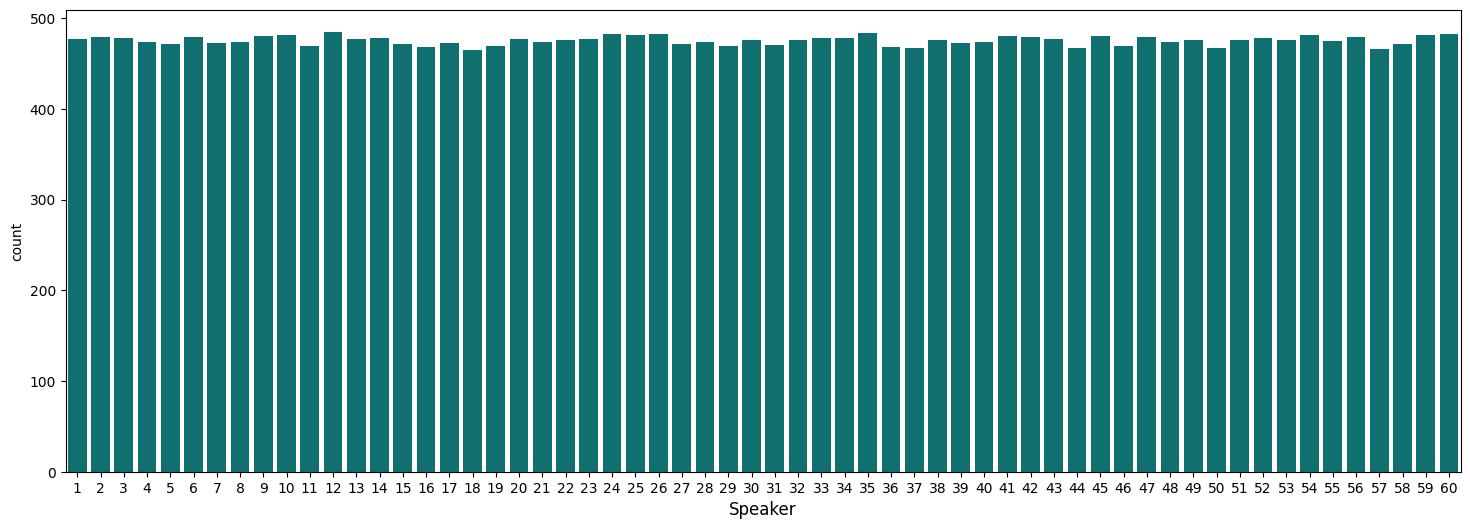

In [8]:
plt.figure(figsize=(18, 6))
sn.countplot(data=y_train, x='label_1', color='teal')
plt.xlabel('Speaker', fontsize=12)

In [9]:
len(y_train['label_1'].unique())

60

In [10]:
from sklearn.metrics import classification_report

def get_score(model, X_train, y_train, X_val, y_val, verbose = False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    if verbose:
        print(classification_report(y_val, y_pred))

    return accuracy_score(y_val, y_pred)

In [11]:
def evaluate_models(models, X_train, y_train, X_valid, y_valid):
    model_accuracies = {
        model_name: get_score(model, X_train, y_train, X_valid, y_valid)
        for model_name, model in models.items()
    }
    # Plot the accuracies
    plt.figure(figsize=(10, 6))
    plt.bar(model_accuracies.keys(), model_accuracies.values())
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.ylim([0, 1])
    plt.xticks(rotation=45)
    plt.show()


In [11]:
acc_logistic = cross_val_score(LogisticRegression(), X_train, y_train['label_1'], cv=3)

In [18]:
acc_svc = cross_val_score(SVC(C=1000, gamma=0.001), X_train, y_train['label_1'], cv=3).mean()

In [19]:
acc_svc

0.9617111499292569

In [7]:
acc_rfc = cross_val_score(RandomForestClassifier(), X_train, y_train['label_1'], cv=3)

In [18]:
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (acc_logistic.mean(), acc_logistic.std() * 2))
print("SVC Accuracy: %0.2f (+/- %0.2f)" % (acc_svc.mean(), acc_svc.std() * 2))
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (acc_rfc.mean(), acc_rfc.std() * 2))

Logistic Regression Accuracy: 0.96 (+/- 0.00)
SVC Accuracy: 0.95 (+/- 0.00)
Random Forest Accuracy: 0.87 (+/- 0.01)


In [22]:
cross_val_score(LogisticRegression(), X_train_scaled, y_train['label_1'], cv=3).mean()

0.9643408281301328

In [11]:
get_score(
    LogisticRegression(), 
    X_train_scaled, y_train['label_1'], 
    X_val_scaled, y_val['label_1']
)

0.972

In [14]:
pca = PCA(n_components=0.95, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

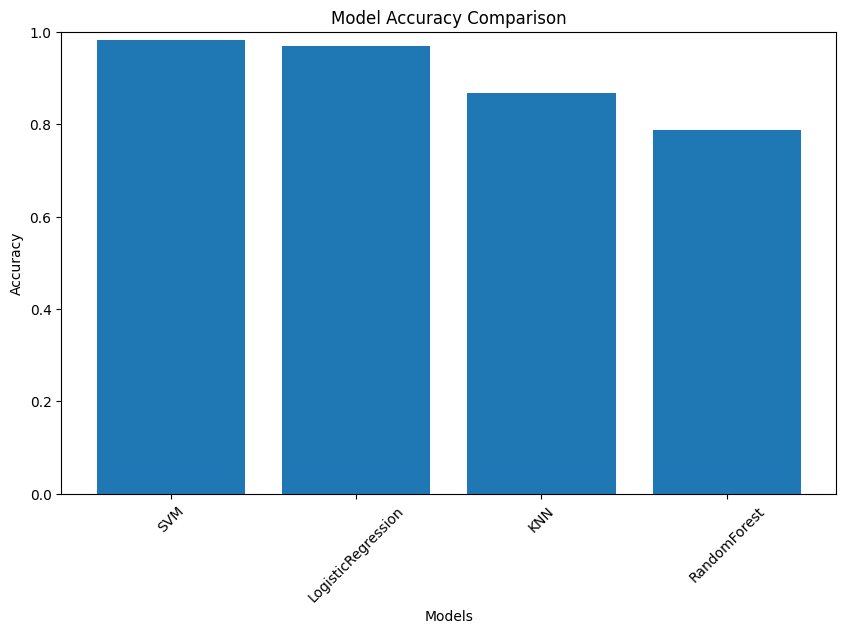

In [28]:
models = {
    'SVM': SVC(C=1000, gamma=0.001),
    'LogisticRegression': LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
}

evaluate_models(models, X_train_pca, y_train['label_1'], X_val_pca, y_val['label_1'])  

In [13]:
from xgboost import XGBClassifier

get_score(
    XGBClassifier(num_class=len(y_train['label_1'].unique()), tree_method='gpu_hist', gpu_id= 0),
    X_train_pca, y_train['label_1']-1,
    X_val_pca, y_val['label_1']-1
)

0.848

In [11]:
get_score(
    SVC(C=1000, gamma=0.001, kernel='rbf'),
    X_train_pca, y_train['label_1'],
    X_val_pca, y_val['label_1'],
    verbose=True
)

              precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00         9
           3       0.92      1.00      0.96        12
           4       0.89      1.00      0.94        16
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        14
           9       1.00      0.91      0.95        11
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00         7
          13       1.00      0.91      0.95        11
          14       0.94      1.00      0.97        15
          15       1.00      0.94      0.97        17
          16       1.00      1.00      1.00        14
          17       1.00      1.00      1.00        14
          18       1.00    

0.9813333333333333

In [20]:
cross_val_score(SVC(C=1000, gamma=0.001, kernel='rbf'), X_train_pca, y_train['label_1'], cv=3).mean()

0.9628330748985509

In [31]:
Hyper Parameter Tuning For SVC

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_pca, y_train['label_1'])
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time= 1.9min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time= 1.9min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time= 1.9min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time= 1.9min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time= 1.9min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.017 total time= 1.8min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.017 total time= 1.8min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.017 total time= 1.8min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.017 total time= 1.8min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.017 total time= 1.8min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.022 total time= 1.8min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [40]:
# grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [16]:
# Saving the model

# import joblib
# loaded_model = joblib.load('svc_label_1.pkl')

# loaded_model

SVC(C=1000, gamma=0.001)

In [15]:
get_score(
    CatBoostClassifier(loss_function='MultiClass', task_type="GPU",
                           devices='0:1'),
    X_train_pca, y_train['label_1'],
    X_val_pca, y_val['label_1']
)

Learning rate set to 0.128568
0:	learn: 3.8722867	total: 112ms	remaining: 1m 51s
1:	learn: 3.7131503	total: 202ms	remaining: 1m 40s
2:	learn: 3.5849659	total: 289ms	remaining: 1m 36s
3:	learn: 3.4926461	total: 373ms	remaining: 1m 32s
4:	learn: 3.3947164	total: 456ms	remaining: 1m 30s
5:	learn: 3.3086609	total: 540ms	remaining: 1m 29s
6:	learn: 3.2220325	total: 625ms	remaining: 1m 28s
7:	learn: 3.1476245	total: 707ms	remaining: 1m 27s
8:	learn: 3.0763305	total: 792ms	remaining: 1m 27s
9:	learn: 3.0004723	total: 876ms	remaining: 1m 26s
10:	learn: 2.9334190	total: 962ms	remaining: 1m 26s
11:	learn: 2.8772969	total: 1.04s	remaining: 1m 26s
12:	learn: 2.8211483	total: 1.13s	remaining: 1m 25s
13:	learn: 2.7647561	total: 1.21s	remaining: 1m 25s
14:	learn: 2.7016214	total: 1.3s	remaining: 1m 25s
15:	learn: 2.6391921	total: 1.39s	remaining: 1m 25s
16:	learn: 2.5884555	total: 1.47s	remaining: 1m 25s
17:	learn: 2.5444326	total: 1.55s	remaining: 1m 24s
18:	learn: 2.4939576	total: 1.64s	remaining: 

0.944

In [26]:
best_model_label_1 = SVC(C=1000, gamma=0.001, kernel='rbf')

In [27]:

pred_label1 = best_model_label_1.fit(X_train_pca, y_train['label_1']).predict(X_test_pca)

In [20]:
pred_label1.shape

(744,)

In [31]:
get_score(
    SVC(C=1000, gamma=0.001, kernel='rbf'),
    X_train_pca, y_train['label_1'],
    X_val_pca, y_val['label_1'],
    verbose= True
)

              precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00         9
           3       0.92      1.00      0.96        12
           4       0.89      1.00      0.94        16
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        14
           9       1.00      0.91      0.95        11
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00         7
          13       1.00      0.91      0.95        11
          14       0.94      1.00      0.97        15
          15       1.00      0.94      0.97        17
          16       1.00      1.00      1.00        14
          17       1.00      1.00      1.00        14
          18       1.00    

0.9813333333333333

In [29]:
y_pred = SVC(C=1000, gamma=0.001, kernel='rbf').fit(X_train_pca, y_train['label_1']).predict(X_val_pca)
confusion = metrics.confusion_matrix(y_val['label_1'], y_pred)

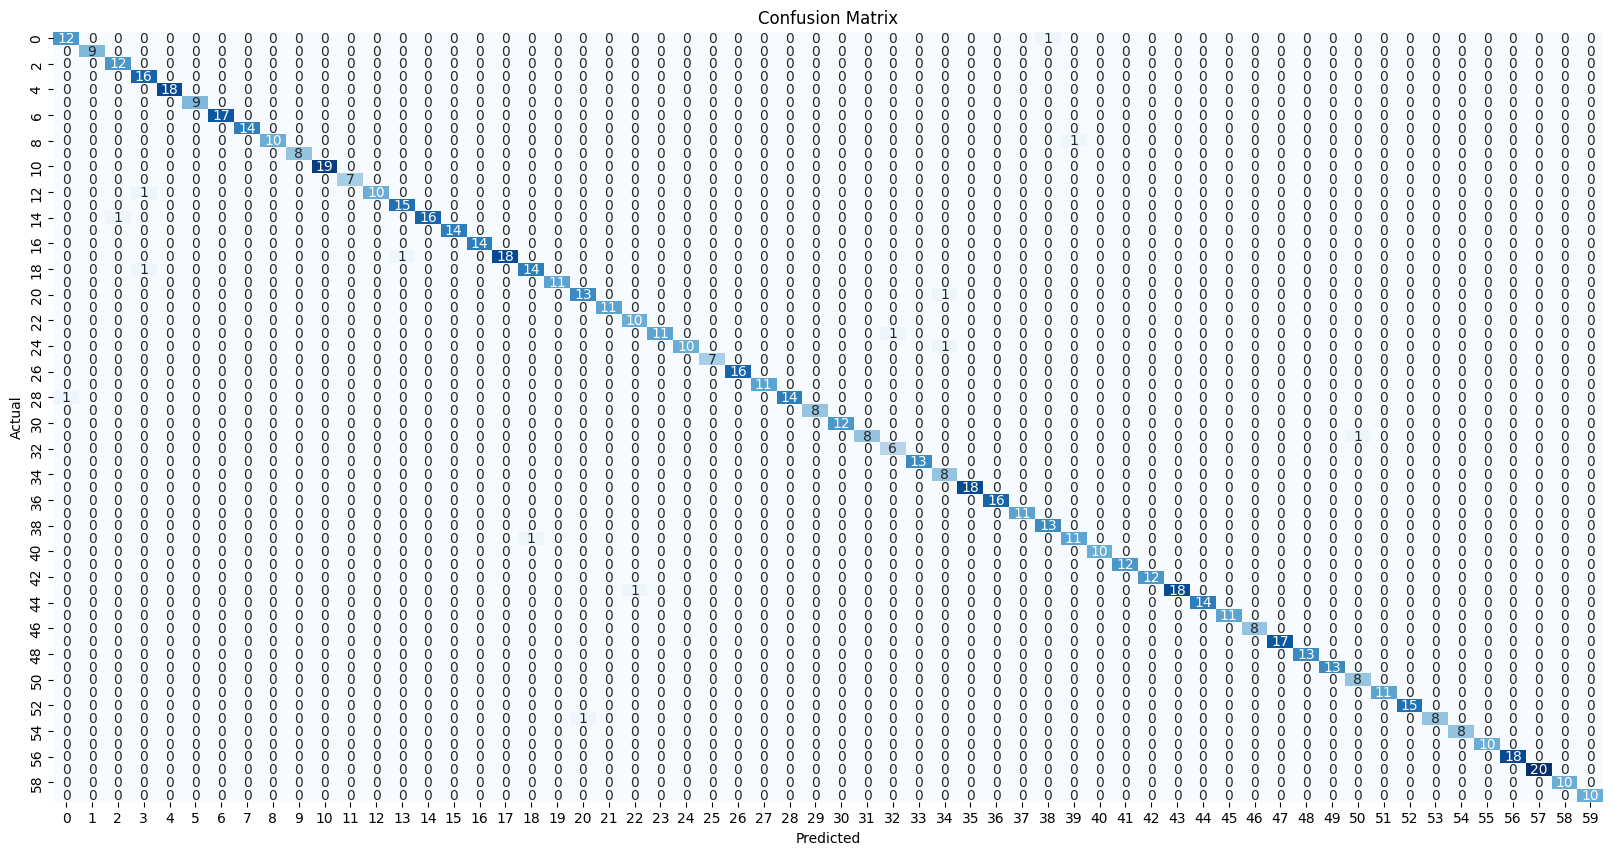

In [30]:
plt.figure(figsize=(20, 10))
sn.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [40]:
best_model_label_1 = SVC(C=1000, gamma=0.001, kernel='rbf', probability=True)
best_model_label_1.fit(X_train_pca, y_train['label_1'])
pred = best_model_label_1.predict(X_val_pca)
accuracy_score(y_val['label_1'], pred )

0.9813333333333333

In [41]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=y_train['label_1'].unique())

### Label_2

In [12]:
train['label_2'].isnull().sum()

480

In [13]:
label2_train = train.copy()
label2_valid = valid.copy()
label2_test = test.copy()

In [14]:
label2_train = label2_train.dropna(subset=['label_2'])
label2_valid = label2_valid.dropna(subset=['label_2'])

In [15]:
label2_train['label_2'].isnull().sum()

0

In [16]:
X_train = label2_train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_train = label2_train[['label_1', 'label_2', 'label_3', 'label_4']]
X_val = label2_valid.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_val = label2_valid[['label_1', 'label_2', 'label_3', 'label_4']]
X_test = label2_test.drop(['ID'], axis=1)

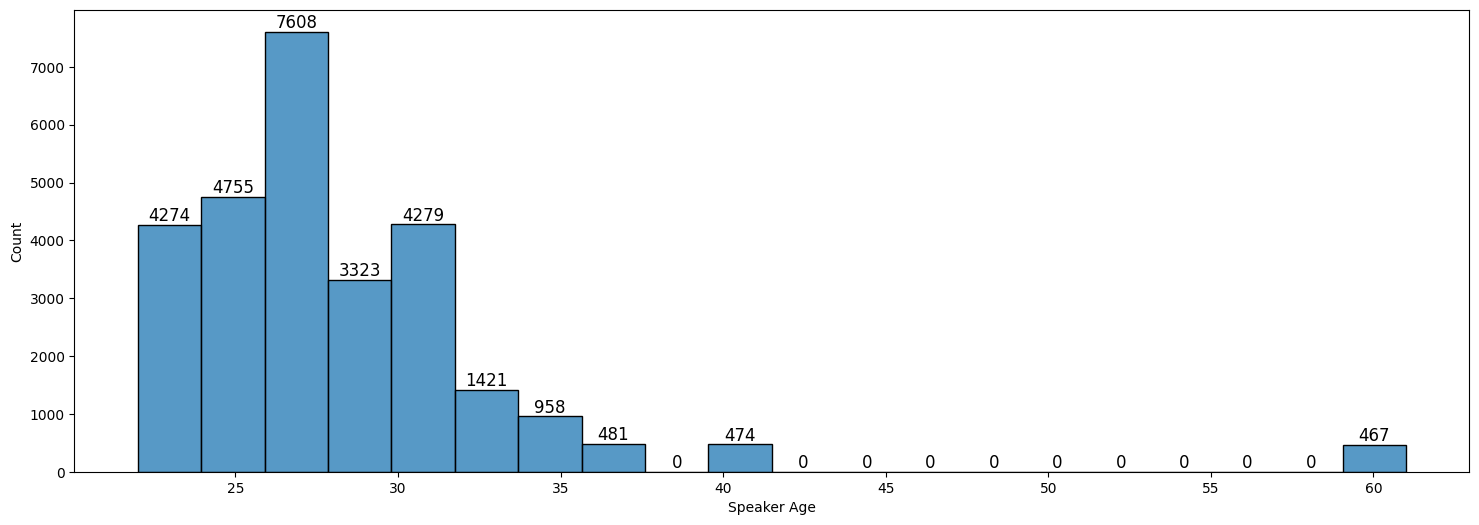

In [17]:
plt.figure(figsize=(18, 6))
ax = sn.histplot(data=y_train, x='label_2', bins=20, kde=False)
plt.xlabel('Speaker Age')

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.show()

In [18]:
y_train['label_2'].nunique()

17

In [19]:
y_train['label_2'].value_counts()

label_2
26.0    4762
25.0    2849
27.0    2846
23.0    2842
31.0    2385
24.0    1906
28.0    1899
30.0    1894
22.0    1432
29.0    1424
33.0     945
36.0     481
35.0     480
34.0     478
32.0     476
41.0     474
61.0     467
Name: count, dtype: int64

In [20]:
X_train.shape

(28040, 768)

In [21]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [22]:
pca = PCA(n_components=0.95, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [69]:
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Use GridSearch
clf = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=10)
best_model = clf.fit(X_train_pca,y_train['label_2'])
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

best_model.best_estimator_

In [110]:
get_score(
    KNeighborsClassifier(n_neighbors=11),
    X_train_pca, y_train['label_2'],
    X_val_pca, y_val['label_2']
)

0.8546195652173914

In [73]:
# label2_train_filtered = label2_train[label2_train['label_2'] < 45]
# X_train_filtered = label2_train_filtered.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
# y_train_filtered = label2_train_filtered[['label_1', 'label_2', 'label_3', 'label_4']]

In [74]:
# X_train_filtered.shape

In [75]:
# scaler = StandardScaler()
# X_train_scaled_filtered = scaler.fit_transform(X_train_filtered)
# X_val_scaled_filtered = scaler.transform(X_val)
# X_test_scaled_filtered = scaler.transform(X_test)

# pca = PCA(n_components=0.95, svd_solver = 'full')
# X_train_pca_filtered = pca.fit_transform(X_train_scaled_filtered)
# X_val_pca_filtered = pca.transform(X_val_scaled_filtered)
# X_test_pca_filtered = pca.transform(X_test_scaled_filtered)


In [30]:
# from sklearn.model_selection import GridSearchCV
  
# # defining parameter range
# param_grid = {'C': [1000, 1200, 1300, 1500, 1600, 2000, 1800, 2200],
#               'kernel': ['rbf']} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
# grid.fit(X_train_pca, y_train['label_2'])
# grid.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ................C=1000, kernel=rbf;, score=0.451 total time=  44.5s
[CV 2/5] END ................C=1000, kernel=rbf;, score=0.671 total time=  47.4s
[CV 3/5] END ................C=1000, kernel=rbf;, score=0.720 total time=  45.9s
[CV 4/5] END ................C=1000, kernel=rbf;, score=0.716 total time=  45.2s
[CV 5/5] END ................C=1000, kernel=rbf;, score=0.484 total time=  44.3s
[CV 1/5] END ................C=1200, kernel=rbf;, score=0.451 total time=  43.4s
[CV 2/5] END ................C=1200, kernel=rbf;, score=0.671 total time=  44.5s
[CV 3/5] END ................C=1200, kernel=rbf;, score=0.720 total time=  44.6s
[CV 4/5] END ................C=1200, kernel=rbf;, score=0.716 total time=  45.2s
[CV 5/5] END ................C=1200, kernel=rbf;, score=0.484 total time=  44.3s
[CV 1/5] END ................C=1300, kernel=rbf;, score=0.451 total time=  43.5s
[CV 2/5] END ................C=1300, kernel=rbf;,

{'C': 1000, 'kernel': 'rbf'}

In [71]:
get_score(
    SVC(C=1000),
    X_train_pca, y_train['label_2'],
    X_val_pca, y_val['label_2']
)

0.9538043478260869

In [23]:
get_score(
    CatBoostClassifier(loss_function='MultiClass'
                       , learning_rate = 0.15),
    X_train_pca, y_train['label_2'],
    X_val_pca, y_val['label_2']
) * 100

0:	learn: 2.7153404	total: 252ms	remaining: 4m 11s
1:	learn: 2.6406258	total: 460ms	remaining: 3m 49s
2:	learn: 2.5766717	total: 667ms	remaining: 3m 41s
3:	learn: 2.4985682	total: 871ms	remaining: 3m 36s
4:	learn: 2.4433886	total: 1.07s	remaining: 3m 32s
5:	learn: 2.4079165	total: 1.27s	remaining: 3m 30s
6:	learn: 2.3629540	total: 1.47s	remaining: 3m 28s
7:	learn: 2.3304958	total: 1.67s	remaining: 3m 27s
8:	learn: 2.2925247	total: 1.88s	remaining: 3m 26s
9:	learn: 2.2544500	total: 2.08s	remaining: 3m 26s
10:	learn: 2.2283232	total: 2.3s	remaining: 3m 26s
11:	learn: 2.1969310	total: 2.51s	remaining: 3m 26s
12:	learn: 2.1712548	total: 2.73s	remaining: 3m 26s
13:	learn: 2.1418633	total: 2.95s	remaining: 3m 27s
14:	learn: 2.1135877	total: 3.15s	remaining: 3m 27s
15:	learn: 2.0860190	total: 3.35s	remaining: 3m 26s
16:	learn: 2.0581942	total: 3.55s	remaining: 3m 25s
17:	learn: 2.0366281	total: 3.76s	remaining: 3m 25s
18:	learn: 2.0152154	total: 3.97s	remaining: 3m 24s
19:	learn: 1.9935226	to

83.83152173913044

In [79]:
cross_val_score(SVC(C=1000), X_train_pca, y_train['label_2'], cv=5).mean()

0.607596291012839

In [80]:
best_model_label_2 = SVC(C=1000)
pred_label2 = best_model_label_2.fit(X_train_pca, y_train['label_2']).predict(X_test_pca)

### Label 3

In [81]:
X_train = train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_train = train[['label_1', 'label_2', 'label_3', 'label_4']]
X_val = valid.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_val = valid[['label_1', 'label_2', 'label_3', 'label_4']]
X_test = label2_test.drop(['ID'], axis=1)

Text(0.5, 0, 'Speaker Gender')

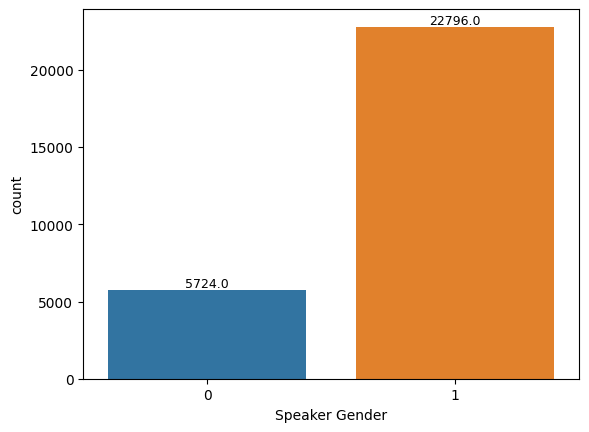

In [82]:
ax = sn.countplot(x=y_train['label_3'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')
    
plt.xlabel('Speaker Gender')

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [84]:
pca = PCA(n_components=0.95, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [85]:
get_score(
    SVC(),
    X_train_pca,y_train['label_3'],
    X_val_pca,y_val['label_3'],
)

1.0

In [88]:
cross_val_score(SVC(), X_train_pca, y_train['label_3'], cv=5).mean()

0.9872370266479663

In [89]:
best_model_label_3 = SVC()
pred_label3 = best_model_label_3.fit(X_train_pca, y_train['label_3']).predict(X_test_pca)

### Label 4

Text(0.5, 0, 'Speaker Gender')

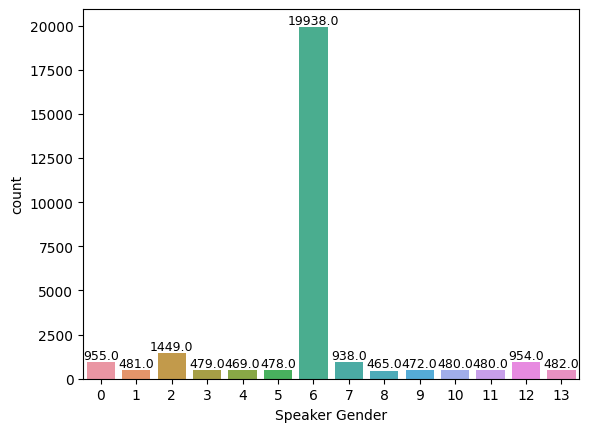

In [90]:
ax = sn.countplot(x=y_train['label_4'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')
    
plt.xlabel('Speaker Gender')

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [92]:
pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [93]:
get_score(
    SVC(class_weight='balanced', C=1000),
    X_train_pca,y_train['label_4'],
    X_val_pca,y_val['label_4']
)

0.972

In [94]:
cross_val_score(SVC(class_weight='balanced', C=1000), X_train_pca, y_train['label_4'], cv=5, scoring='accuracy').mean()

0.9477559607293127

In [95]:
best_model_label_4 = SVC(class_weight='balanced', C=1000)
pred_label4 = best_model_label_4.fit(X_train_pca, y_train['label_4']).predict(X_test_pca)

### Generating Output

In [100]:
output_df = test[['ID']]
output_df['label_1'] = pred_label1
output_df['label_2'] = pred_label2
output_df['label_3'] = pred_label3
output_df['label_4'] = pred_label4

In [101]:
output_df.head()

,ID,label_1,label_2,label_3,label_4
0,1,26,22.0,0,2
1,2,18,25.0,1,8
2,3,16,30.0,1,6
3,4,7,27.0,1,6
4,5,58,29.0,0,6


In [103]:
output_df.to_csv('outputs/output_layer7.csv', index=False)

In [104]:
output_df.shape

(744, 5)